<a href="https://colab.research.google.com/github/SuwilanjiTrey/DataMining-11/blob/main/dataMiningGroup11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM Phase: Business Understanding — This stage defines the scope, objectives, and success criteria for the project before proceeding to Data Understanding.

##1. Business Understanding

###1.1 Problem Statement

###The Zambian judiciary produces a large number of legal judgments each year, each accompanied by descriptive information such as the case title, case number, court, judgment date, judges presiding, a brief case summary, and relevant keywords. Currently, classification of judgments by type (e.g., criminal, civil, constitutional, commercial) is often done manually, which is time-consuming, inconsistent, and resource-intensive. This lack of automation makes it difficult for legal practitioners, researchers, and the public to quickly locate relevant cases, reducing the efficiency of legal research and limiting access to timely legal information.


###1.2 Business Objectives


#### From a practical, real-world perspective, success means developing an automated solution that: Classifies judgments into correct categories using only their descriptive information. Reduces the time required to find relevant judgments for legal professionals, students, and researchers. Improves consistency and accuracy in classification compared to manual methods.Enhances public access to categorized legal information, supporting civic education and transparency.


###1.3 Data Mining Goals


####To achieve these business objectives, we will:
####Build a supervised machine learning classification model that predicts the type of judgment based on descriptive information fields:
        

####1.   Case Title
####2.   Case Number
####3.   Court
###4.   Judgment Date
###5.   Judges presiding
###6.   Case summary
###7.   Keywords


        
        

####Preprocess and encode the descriptive text to extract meaningful features for classification.
####Evaluate multiple algorithms (e.g., Logistic Regression, BERT-based models, etc) to determine the best performing classifier.










      














###1.4 Initial Project Success Criteria

####The following are the measures put in place to consider this project a successful:
Quantitative Criteria
1. The model achieves at least 80% accuracy on a held-out test set.

2. The model maintains a macro F1-score above 0.75, ensuring balanced performance across all classes.

Qualitative Criteria:
1. The predicted categories are meaningful and consistent with expert legal classification.

2. The classification process is significantly faster than manual sorting.

3. The model generalizes well to new, unseen judgments.

##2. Data Understanding

### 1.Load your datasets into a pandas dataframe

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import pandas as pd
file_path = "/content/drive/MyDrive/Colab_Notebook/misc-unza25-csc4792-project_team11/Group_11_classification_of_judgements - Group_11_Classification_of_type.csv"
df = pd.read_csv(file_path)

### 2. Perform initial data exploration using commands like .head(), .info(), .describe(), and .shape

In [3]:
df.head()

,CaseTitle,CaseNumber,Court,JudgementDate,JudgesPresiding,CaseSummary,Keywords
0,Chachinja Money Lenders v Mungole Chimpende,2024/SID/108,Subordiante Court of Zambia,15/10/2024,Hon. Mondoka,"a lady borrowed K300,000 from the Chinese mone...",NaN
1,People v Elizabeth Nkonde and Billington Mosha,2SPR/223/22,Subordiante Court of Zambia,30/06/2025,His Worship Mr Trevor Kasanda Kalisilira,A woman has dragged her daughter to the Lusaka...,NaN
2,Martin Sichilya v Dr. Kapaza Lungu,2024/SD/84,Subordiante Court of Zambia,15/10/2024,Hon. Mondoka,This judgment arises from a claim in which the...,NaN
3,Enserve Limited v Zambian Breweries Plc,2024/HPC/0800,High Court of Zambia,12/08/2025,Hon. Mrs. Justice K. E. Mwenda-Zimba,In Alfred Kunda v Geoffrey Mulenga (2022/CCZ/0...,"Constitutional Court, Grade 12 certificate, pa..."
4,Anne Mbewe- Anamela v Embassy of Ireland,2023/HP/1762,High Court of Zambia,01/08/2025,Mulenga J,In Anne Mbewe-Anamela v Embassy of Ireland (20...,"diplomatic immunity, constructive dismissal, l..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CaseTitle        218 non-null    object
 1   CaseNumber       218 non-null    object
 2   Court            218 non-null    object
 3   JudgementDate    218 non-null    object
 4   JudgesPresiding  210 non-null    object
 5   CaseSummary      187 non-null    object
 6   Keywords         70 non-null     object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
df.describe()

,CaseTitle,CaseNumber,Court,JudgementDate,JudgesPresiding,CaseSummary,Keywords
count,218,218,218,218,210,187,70
unique,215,204,6,170,135,154,69
top,People v Jonathan Sikazwe,3D/14/23,Subordinate Court of Zambia,17/11/2017,Hon. Mondoka,A group of applicants sought leave to commence...,"Constitutional interpretation, Court restructu..."
freq,2,3,72,6,33,6,2


In [6]:
df.shape

(218, 7)

### 3. Create initial visualizations (e.g., histograms for numerical columns, bar charts for categorical columns) to understand the distributions of key attributes

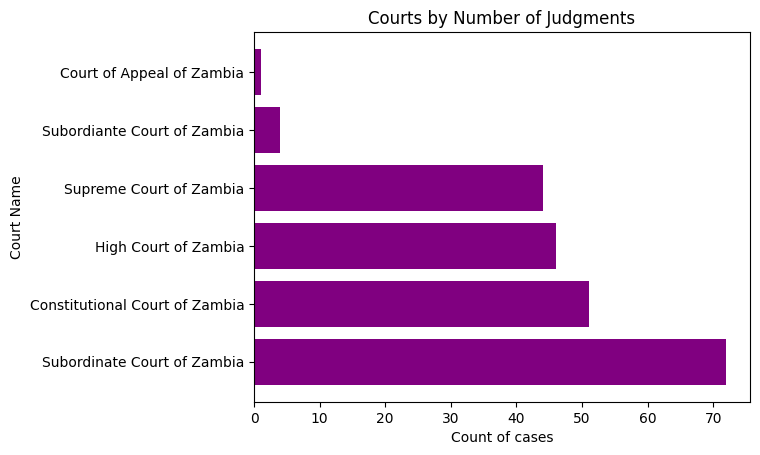

In [7]:
import matplotlib.pyplot as plt
var_court_counts = df['Court'].value_counts()
plt.barh(var_court_counts.index,var_court_counts.values,color="purple")
plt.title("Courts by Number of Judgments")
plt.xlabel("Count of cases")
plt.ylabel("Court Name")
plt.show()

###4. Write a brief summary of your initial findings

#### Our initial findings for this are:
* For now the dataset contains 19 rows and 7 columns
* The columns include Case Title, Case Number, Court, Judgement Date, Judges Presiding, Case Summary, Keywords
* Some fields contain missing values that may need cleaning
* The distribution of judgement types is imbalanced, with High court cases being the most and court of appeal having the fewest
* Zambia legal information institute (Z.L.I.I.) was our main source of data
* Text-based fields will require preprocessing, possibly the following:
 * _Tokenization_
 * _Stopword removal_
 * _embeddings_

###3. Data preparation

In this phase, we clean, transform, and prepare our dataset for modeling.  
This involves:

1. **Data Cleaning** – Handling missing values, correcting inconsistencies, removing duplicates.  
2. **Feature Engineering** – Creating new variables that add predictive power.  
3. **Data Transformation** – Encoding categorical variables, scaling numerical features, etc.  

We carefully document each decision and provide rationale.

###  3.1 Data Cleaning
We start by checking missing values and duplicates.  
Since some features may have skewed distributions, we choose **median imputation** for numeric data and **mode imputation** for categorical data.


In [9]:
# Check missing values
df.isnull().sum().sort_values(ascending=False).head(10)

# Fill numeric NaN with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical NaN with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Strip whitespace, convert to lowercase
df['Keywords'] = df['Keywords'].str.lower()
df['Court'] = df['Court'].str.strip().str.lower()
df['CaseSummary'] = df['CaseSummary'].str.lower()

#remove punctuations from CaseSummary
import string

def fxn_punctuation(var_text):
    if not isinstance(var_text, str):
        return var_text
    translator = str.maketrans('', '', string.punctuation)

    clean_text = var_text.translate(translator)

    return clean_text


df['CaseSummary'] = df['CaseSummary'].apply(fxn_punctuation)

#Remove stopwords from Case Summary
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')


def fxn_stopwords(var_text):
    var_stop = set(stopwords.words("english"))
    return " ".join([var_word for var_word in var_text.split() if var_word not in var_stop])

df['CaseSummary'] = df['CaseSummary'].apply(fxn_stopwords)

# Drop duplicates
df.drop_duplicates(inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CaseTitle        218 non-null    object
 1   CaseNumber       218 non-null    object
 2   Court            218 non-null    object
 3   JudgementDate    218 non-null    object
 4   JudgesPresiding  218 non-null    object
 5   CaseSummary      218 non-null    object
 6   Keywords         218 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


/tmp/ipython-input-2029194740.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 3.2 Feature Engineering
We create new variables to enhance predictive performance.  

Examples:
- `AverageQuizScore` = mean of Quiz1–Quiz10  
- `PassFail` = binary target (1 if Final Examination ≥ 50, else 0)  


In [11]:
import pandas as pd

# Create a judgement type column based off this function
def assign_judgment_type(summary):
    summary = str(summary).lower()  # convert to lowercase for matching

    # Criminal cases
    if any(word in summary for word in ["murder", "robbery", "theft", "assault", "criminal"]):
        return "Criminal"

    # Civil cases
    elif any(word in summary for word in ["contract", "damages", "tort", "negligence", "civil"]):
        return "Civil"

    # Constitutional cases
    elif any(word in summary for word in ["constitution", "bill of rights", "fundamental rights", "constitutional"]):
        return "Constitutional"

    # Commercial cases
    elif any(word in summary for word in ["company", "shareholder", "business", "bankruptcy", "commercial"]):
        return "Commercial"

    # Default if no match
    else:
        return "Undetermined"

# Apply function to your dataframe
df["JudgmentType"] = df["CaseSummary"].apply(assign_judgment_type)


# Feature 1: Title length
df['CaseTitleLength'] = df['CaseTitle'].astype(str).apply(len)

# Feature 2: Number of judges
df['NumJudges'] = df['JudgesPresiding'].astype(str).apply(lambda x: len(x.split(',')))

# Feature 3: Summary length
df['CaseSummaryLength'] = df['CaseSummary'].astype(str).apply(len)

# Feature 4: Has keywords (binary)
df['HasKeywords'] = df['Keywords'].notnull().astype(int)

# Feature 5: Extract Year from JudgementDate
df['Year'] = pd.to_datetime(df['JudgementDate'], errors='coerce').dt.year

df.head()



/tmp/ipython-input-1753777631.py:44: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Year'] = pd.to_datetime(df['JudgementDate'], errors='coerce').dt.year


,CaseTitle,CaseNumber,Court,JudgementDate,JudgesPresiding,CaseSummary,Keywords,JudgmentType,CaseTitleLength,NumJudges,CaseSummaryLength,HasKeywords,Year
0,Chachinja Money Lenders v Mungole Chimpende,2024/SID/108,subordiante court of zambia,15/10/2024,Hon. Mondoka,lady borrowed k300000 chinese money lender ple...,"constitutional interpretation, court restructu...",Civil,43,1,474,1,2024
1,People v Elizabeth Nkonde and Billington Mosha,2SPR/223/22,subordiante court of zambia,30/06/2025,His Worship Mr Trevor Kasanda Kalisilira,woman dragged daughter lusaka high court alleg...,"constitutional interpretation, court restructu...",Commercial,46,1,191,1,2025
2,Martin Sichilya v Dr. Kapaza Lungu,2024/SD/84,subordiante court of zambia,15/10/2024,Hon. Mondoka,judgment arises claim applicant seeks k914400r...,"constitutional interpretation, court restructu...",Undetermined,34,1,675,1,2024
3,Enserve Limited v Zambian Breweries Plc,2024/HPC/0800,high court of zambia,12/08/2025,Hon. Mrs. Justice K. E. Mwenda-Zimba,alfred kunda v geoffrey mulenga 2022ccz0011 co...,"constitutional court, grade 12 certificate, pa...",Constitutional,39,1,250,1,2025
4,Anne Mbewe- Anamela v Embassy of Ireland,2023/HP/1762,high court of zambia,01/08/2025,Mulenga J,anne mbeweanamela v embassy ireland 2023hp1762...,"diplomatic immunity, constructive dismissal, l...",Undetermined,40,1,306,1,2025


In [12]:
# Check results
df[["CaseTitle", "JudgmentType"]]

,CaseTitle,JudgmentType
0,Chachinja Money Lenders v Mungole Chimpende,Civil
1,People v Elizabeth Nkonde and Billington Mosha,Commercial
2,Martin Sichilya v Dr. Kapaza Lungu,Undetermined
3,Enserve Limited v Zambian Breweries Plc,Constitutional
4,Anne Mbewe- Anamela v Embassy of Ireland,Undetermined
...,...,...
213,Jairos Sinyangwe v Twiza Corporative,Civil
214,The People v Gardner Syakantu,Commercial
215,People v Dennis Sinyangwe,Undetermined
216,The People v Christopher Mombe,Undetermined


### 3.3 Data Transformation

We prepare categorical data for modelling.

Steps:
* Encode Categorical variables (e.g court judgesPresiding) into numeric form.
* Standerdize numerical variables(e.g CaseTitleLength, caseSummaryLength) for algorithms sensitive scale

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

#Encode categorical features
encode = LabelEncoder()
df['Court_encoded'] = encode.fit_transform(df['Court'].astype(str))
df['JudgesPresiding_encoded'] = encode.fit_transform(df['JudgesPresiding'].astype(str))
df['JudgmentType_encoded'] = encode.fit_transform(df['JudgmentType'].astype(str))

#One hot encode Court
df_court = pd.get_dummies(df, columns=['Court'])

#Use count vectorizer to vectorize case summary

vectorizer = CountVectorizer(stop_words="english")
X_summary = vectorizer.fit_transform(df['CaseSummary'])

# Convert count vectorized matrix to DataFrame
df_summary = pd.DataFrame(
    X_summary.toarray(),
    columns=vectorizer.get_feature_names_out()
)
#scale numerical features
scaler = StandardScaler()
num_cols = ['CaseTitleLength','CaseSummaryLength']

for col in num_cols:
  df[col +'_scaled']=scaler.fit_transform(df[[col]])

# Combine both encoded features into one DataFrame
X_final = pd.concat([df_court.reset_index(drop=True), df_summary.reset_index(drop=True)], axis=1)



In [14]:
# Concatenate original df + encoded features
df_full = pd.concat([df.reset_index(drop=True), X_final.reset_index(drop=True)], axis=1)

print("Original + Encoded Features:")
print(df_full.iloc[0])

Original + Encoded Features:
CaseTitle          Chachinja Money Lenders v Mungole Chimpende
CaseNumber                                        2024/SID/108
Court                              subordiante court of zambia
JudgementDate                                       15/10/2024
JudgesPresiding                                   Hon. Mondoka
                                      ...                     
zones                                                        0
zr                                                           0
zra                                                          0
zulu                                                         0
œthe                                                         0
Name: 0, Length: 2904, dtype: object


#### Data Preparation Summary

The data preparation phase focuses on cleaning, transforming, and structuring the dataset to ensure it is ready for modeling. This involves addressing missing values and duplicates, creating new features to enhance predictive power, and transforming variables into forms suitable for analysis. This what we did in each stage:

1. Data Cleaning
    - Checked for missing values and duplicates.
    - Filled numeric missing values with median.
    - Filled categorical missing values with mode.
    - Removed duplicate records.
2. Data Preprocessing
    - Removed punctuations from case summary
    - Casefolded court, Keywords and Case summary
    - Removed stopwords from Case summary

3. Feature Engineering
    - Created CaseTitleLength to measure title complexity.
    - Created NumJudges to count judges presiding over the case.
    - Created CaseSummaryLength to measure detail in case summaries.
    - Created HasKeywords as a binary indicator for presence of keywords.
    - Extracted Year from JudgementDate for temporal analysis
    - Created a Judgement Type column
4. Data Transformation
    - Encoded categorical variables (Court, JudgesPresiding) into numeric form.
    - Standardized numerical variables (CaseTitleLength, CaseSummaryLength) for scale-sensitive algorithms.
    - One hot encoded Court and Case Summary with pd.get_dummies and Count vectorizer respectively



### 4. Modeling

In this phase, we apply machine learning algorithms to our prepared dataset.

We selected a **Decision Tree Classifier** because:


*   It is easy to interpret and explain results to non-technical stakeholders.
*   It works well with mixed categorical and numerical features.
*   It can capture non-linear relationships in our data.



In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns
import scipy.sparse as sp
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           2       1.00      0.80      0.89         5
           3       0.00      0.00      0.00         1
           4       0.78      0.95      0.86        19
           5       0.78      0.88      0.82         8

    accuracy                           0.82        44
   macro avg       0.69      0.65      0.66        44
weighted avg       0.81      0.82      0.81        44



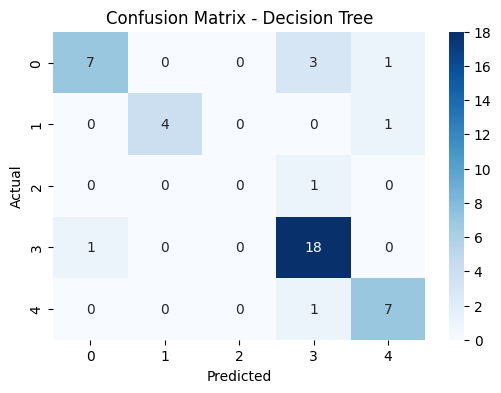

In [19]:
# --- Step 1: Define features & target ---
X = df[['CaseTitleLength_scaled', 'CaseSummaryLength_scaled', 'NumJudges', 'HasKeywords', 'Year']].fillna(0)
y = df['Court_encoded']   # target variable: which court handled the case

# --- Step 2: Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 3: Train Decision Tree ---
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# --- Step 4: Evaluate ---
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Naive Bayes Accuracy: 0.7121212121212122

Classification Report:
                 precision    recall  f1-score   support

         Civil       0.00      0.00      0.00         8
    Commercial       1.00      0.87      0.93        15
Constitutional       1.00      0.20      0.33         5
      Criminal       1.00      0.64      0.78        14
  Undetermined       0.56      1.00      0.72        24

      accuracy                           0.71        66
     macro avg       0.71      0.54      0.55        66
  weighted avg       0.72      0.71      0.66        66



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


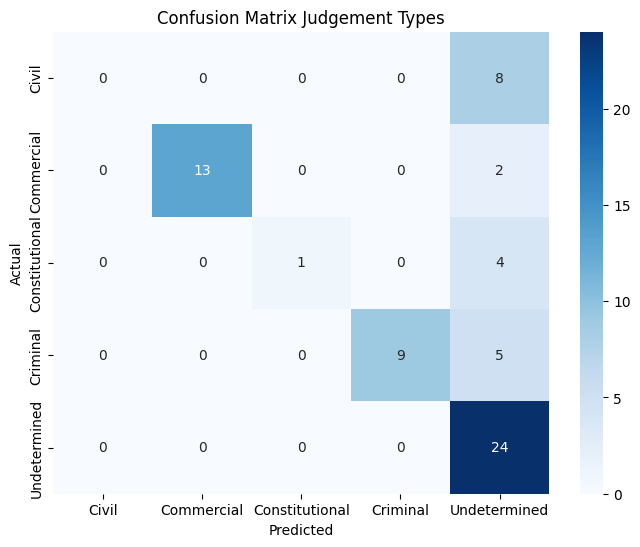

In [20]:
# Encode target variable
label_e = LabelEncoder()
y = label_e.fit_transform(df["JudgmentType"])
caseSummary = df["CaseSummary"].astype(str)
X = caseSummary  # Features (text only)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=10000,
    ngram_range=(1,5),   # unigrams + bigrams + trigrams and beyond .......
    min_df=2,            # ignore words appearing in <2 docs
    max_df=0.9           # ignore words appearing in >90% docs
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_e.classes_))

#Graphical representation
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_e.classes_,
            yticklabels=label_e.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Judgement Types")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


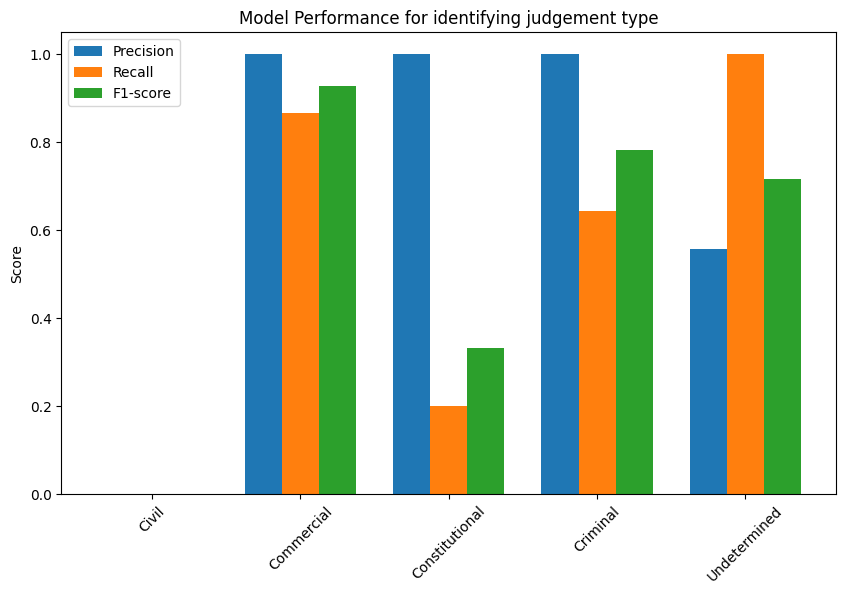

In [21]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Extract metrics
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred)

x = np.arange(len(label_e.classes_))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, prec, width, label="Precision")
plt.bar(x, rec, width, label="Recall")
plt.bar(x + width, f1, width, label="F1-score")

plt.xticks(x, label_e.classes_, rotation=45)
plt.ylabel("Score")
plt.title("Model Performance for identifying judgement type")
plt.legend()
plt.show()


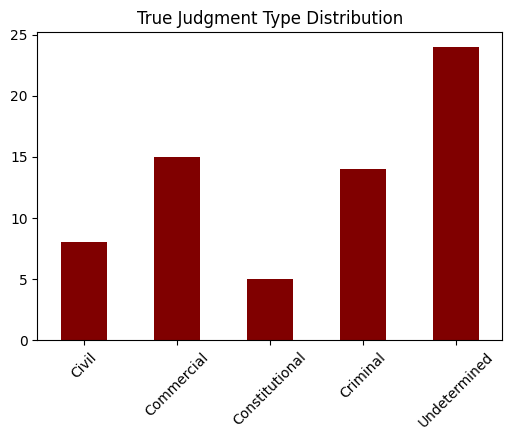

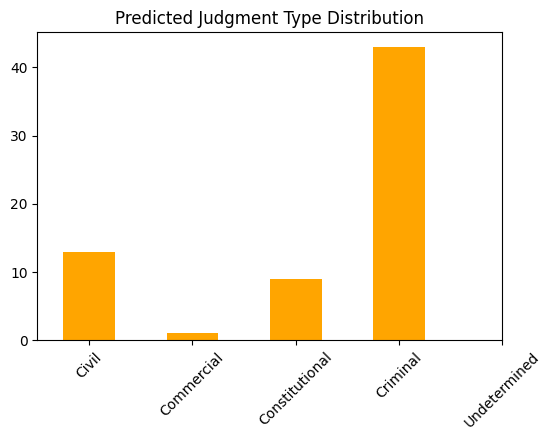

In [22]:
# True label distribution
plt.figure(figsize=(6,4))
pd.Series(y_test).value_counts().sort_index().plot(kind="bar", color="maroon")
plt.xticks(ticks=range(len(label_e.classes_)), labels=label_e.classes_, rotation=45)
plt.title("True Judgment Type Distribution")
plt.show()

# Predicted label distribution
plt.figure(figsize=(6,4))
pd.Series(y_pred).value_counts().sort_index().plot(kind="bar", color="orange")
plt.xticks(ticks=range(len(label_e.classes_)), labels=label_e.classes_, rotation=45)
plt.title("Predicted Judgment Type Distribution")
plt.show()
